### Link dataset: https://www.kaggle.com/datasets/andrewmvd/animal-faces

In [1]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.6 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,BatchNormalization,ReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers, models
import keras_tuner as kt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import os
from sklearn.utils import shuffle

In [3]:
!mkdir -p /content/drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/DPL302m/train/"

In [6]:
def get_images(directory):
    Images = []
    Labels = []
    label = 0

    for labels in os.listdir(directory):
        if labels == 'cat':
            label = 0
        elif labels == 'dog':
            label = 1
        elif labels == 'wild':
            label = 2


        for image_file in os.listdir(directory+labels):
            image = cv2.imread(directory+labels+r'/'+image_file)
            if np.any(image != None):
              image = cv2.resize(image,(64,64))
              Images.append(image)
              Labels.append(label)

    return shuffle(Images,Labels,random_state=817328462)

def get_classlabel(class_code):
    labels = {0:'cat', 1:'dog', 2:'wild'}

    return labels[class_code]

In [7]:
x_train,y_train = get_images(path)

In [8]:
x_train = np.array(x_train)

In [9]:
y_train = np.array(y_train)

In [10]:
x_train.shape

(14650, 64, 64, 3)

In [11]:
label_names = ['cat','dog','wild']

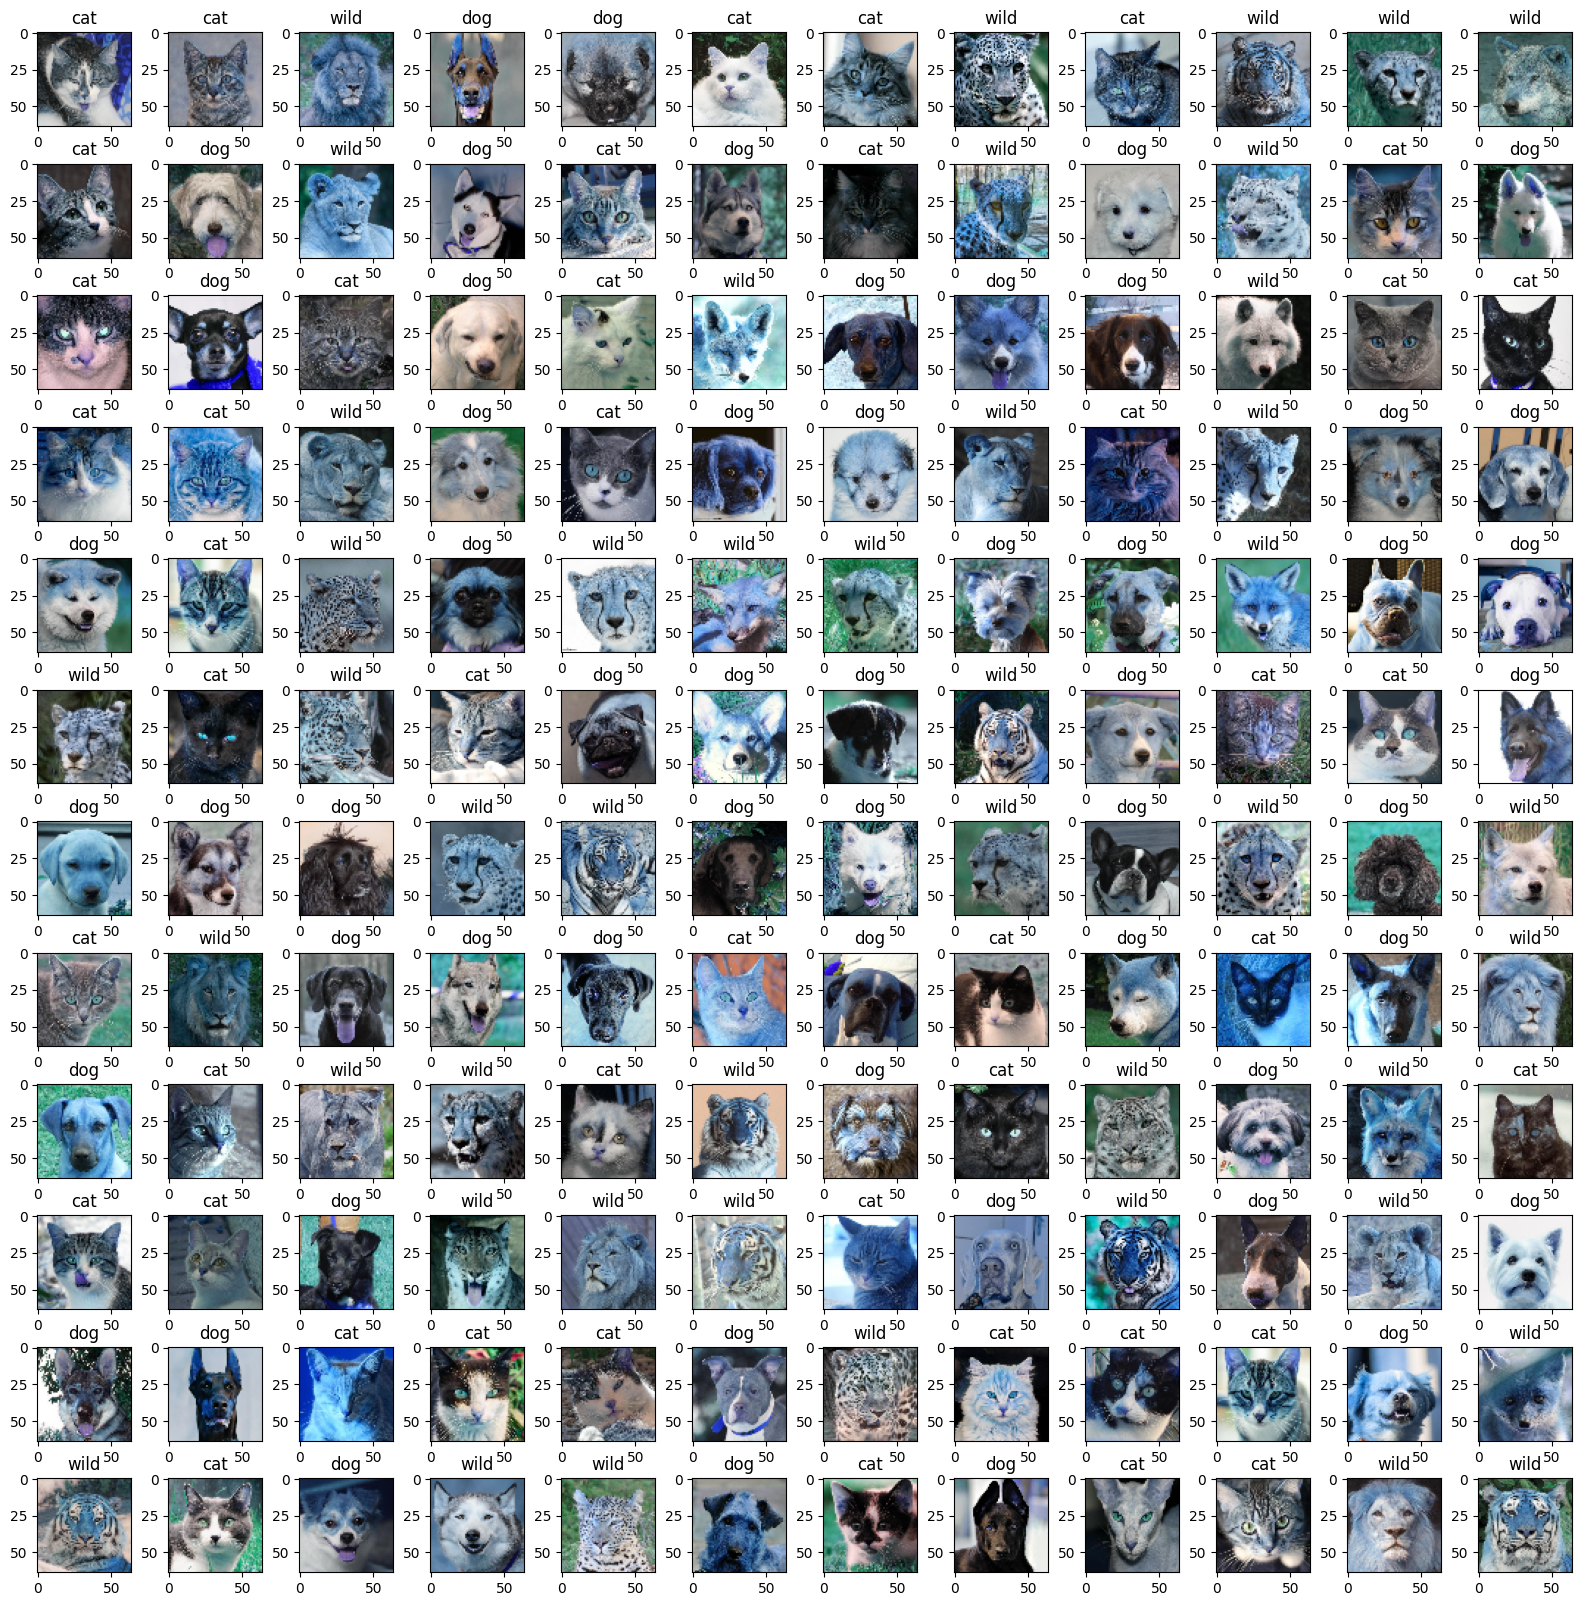

In [12]:
W_grid = 12
L_grid = 12

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20, 20))
axes = axes.ravel()

n_training = len(x_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(x_train[index])
    axes[i].set_title(label_names[y_train[index]],fontsize=12)


plt.subplots_adjust(hspace = 0.4)

In [13]:
path_test = "/content/drive/MyDrive/DPL302m/test/"

In [14]:
x_test,y_test = get_images(path)

In [15]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [16]:
img_train = x_train.astype('float32') / 255.0
img_test = x_test.astype('float32') / 255.0

In [17]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 3)

Mo hinh ban dau chua ap dung toi uu hoa tham so

In [18]:
model = keras.Sequential()
model.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3),padding='same', activation='relu'))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(3,activation='softmax'))
model.compile(optimizer='Adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])


In [19]:
history_o = model.fit(img_train,y_train, batch_size=32, epochs=30,validation_split=0.2)

Epoch 1/30
367/367 [==============================] - 16s 11ms/step - loss: 0.2635 - accuracy: 0.8230 - val_loss: 0.1570 - val_accuracy: 0.9119
Epoch 2/30
367/367 [==============================] - 4s 10ms/step - loss: 0.1245 - accuracy: 0.9305 - val_loss: 0.1150 - val_accuracy: 0.9362
Epoch 3/30
367/367 [==============================] - 3s 9ms/step - loss: 0.0782 - accuracy: 0.9560 - val_loss: 0.1041 - val_accuracy: 0.9403
Epoch 4/30
367/367 [==============================] - 3s 8ms/step - loss: 0.0539 - accuracy: 0.9710 - val_loss: 0.1017 - val_accuracy: 0.9495
Epoch 5/30
367/367 [==============================] - 3s 8ms/step - loss: 0.0410 - accuracy: 0.9787 - val_loss: 0.1211 - val_accuracy: 0.9423
Epoch 6/30
367/367 [==============================] - 4s 10ms/step - loss: 0.0328 - accuracy: 0.9822 - val_loss: 0.1205 - val_accuracy: 0.9406
Epoch 7/30
367/367 [==============================] - 3s 8ms/step - loss: 0.0202 - accuracy: 0.9902 - val_loss: 0.1040 - val_accuracy: 0.9546
Ep

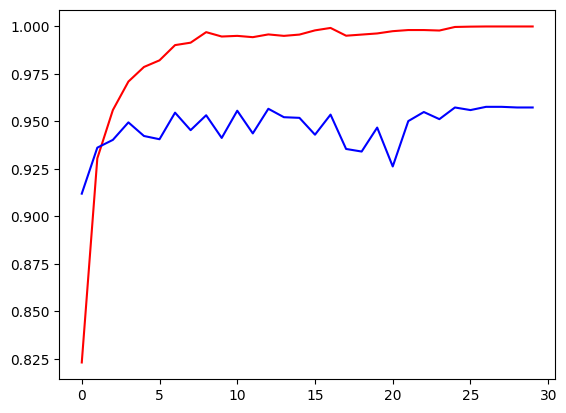

In [20]:
loss = history_o.history['loss']
val_loss = history_o.history['val_loss']
accuracy = history_o.history['accuracy']
val_accuracy = history_o.history['val_accuracy']
plt.plot(accuracy, c='red')
plt.plot(val_accuracy, c='blue')

In [21]:
eval_result = model.evaluate(img_test, y_test)
print("[test loss, test accuracy]:", eval_result)

458/458 [==============================] - 2s 4ms/step - loss: 0.0458 - accuracy: 0.9915
[test loss, test accuracy]: [0.04576129466295242, 0.9914675951004028]


In [23]:
predicted_classes_m1 = model.predict(x_test)
predicted_classes_m1 =np.argmax(predicted_classes_m1,axis=1)
y_test_show = y_test.argmax(1)

458/458 [==============================] - 2s 4ms/step


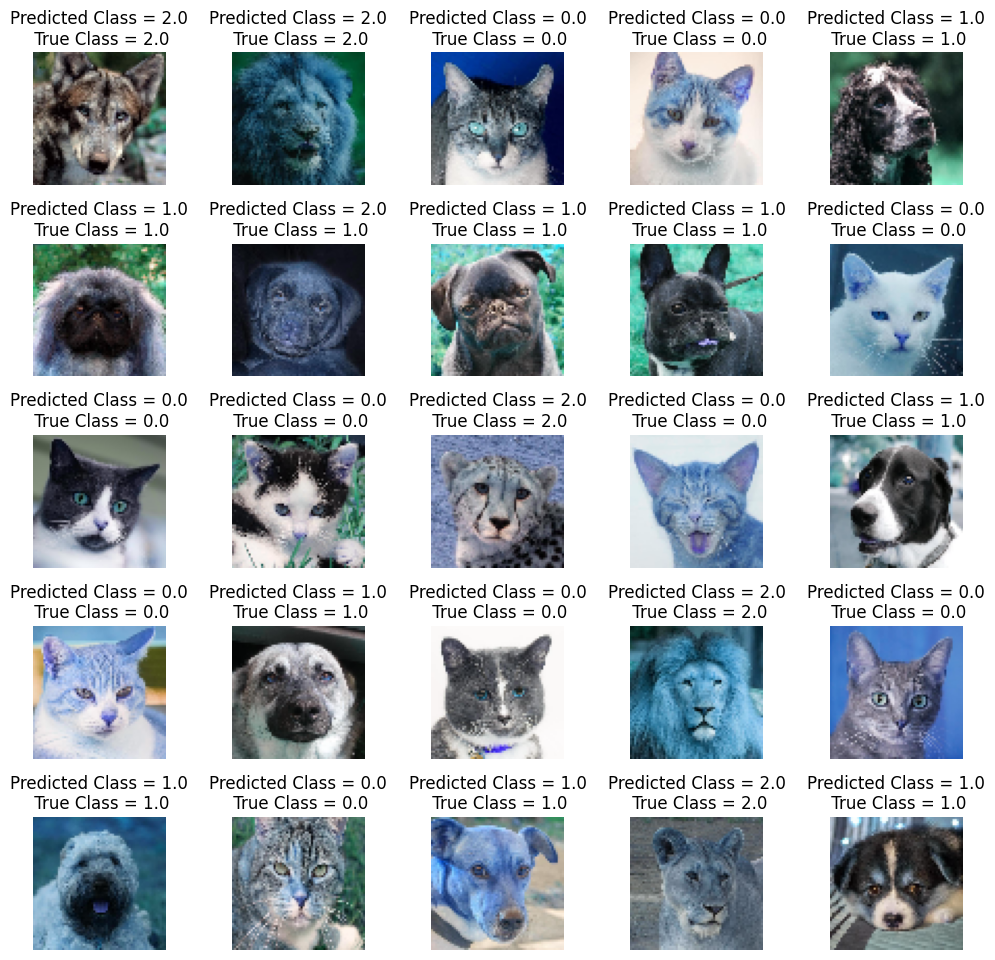

In [25]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes_m1[i], y_test_show[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

nang cao do chinh xac bang viec toi uu learning rate

In [60]:
def model_builder_1(hp):
  model = keras.Sequential()
  model.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(Dropout(hp.Choice(name='dropout',values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
  model.add(Conv2D(64, (3,3),padding='same', activation='relu'))
  model.add(keras.layers.Flatten())

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  model.add(keras.layers.Dense(units=32, activation='relu'))
  model.add(keras.layers.Dense(3,activation='softmax'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
                loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [61]:
tuner = kt.Hyperband(model_builder_1,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='parameters',
                     project_name='intro_to_kt')

In [62]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [63]:
tuner.search(img_train,y_train, epochs=30, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}. {best_hps.get('dropout')}
""")


The hyperparameter search is complete. The optimal learning rate for the optimizer
is 0.001. 0.4



In [30]:
model1 = tuner.hypermodel.build(best_hps)
history = model1.fit(img_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
367/367 [==============================] - 6s 12ms/step - loss: 0.5038 - accuracy: 0.7916 - val_loss: 0.3749 - val_accuracy: 0.8584
Epoch 2/50
367/367 [==============================] - 4s 10ms/step - loss: 0.2109 - accuracy: 0.9230 - val_loss: 0.1903 - val_accuracy: 0.9328
Epoch 3/50
367/367 [==============================] - 4s 11ms/step - loss: 0.1402 - accuracy: 0.9495 - val_loss: 0.1578 - val_accuracy: 0.9389
Epoch 4/50
367/367 [==============================] - 4s 11ms/step - loss: 0.0968 - accuracy: 0.9657 - val_loss: 0.1696 - val_accuracy: 0.9290
Epoch 5/50
367/367 [==============================] - 4s 11ms/step - loss: 0.0622 - accuracy: 0.9779 - val_loss: 0.1425 - val_accuracy: 0.9560
Epoch 6/50
367/367 [==============================] - 4s 11ms/step - loss: 0.0492 - accuracy: 0.9816 - val_loss: 0.1723 - val_accuracy: 0.9474
Epoch 7/50
367/367 [==============================] - 4s 11ms/step - loss: 0.0418 - accuracy: 0.9837 - val_loss: 0.1999 - val_accuracy: 0.9389

In [31]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 53824)             0         
                                                      

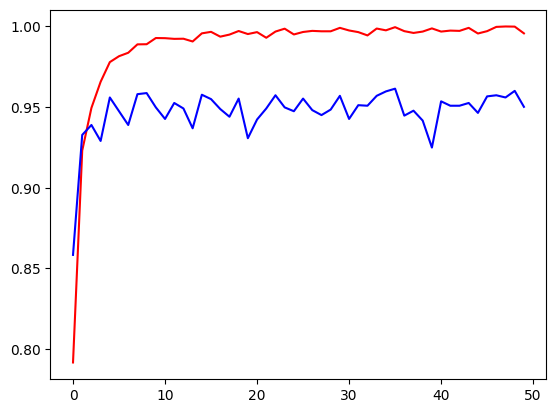

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, c='red')
plt.plot(val_accuracy, c='blue')

In [33]:
hypermodel1 = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel1.fit(img_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/36
367/367 [==============================] - 6s 11ms/step - loss: 0.4492 - accuracy: 0.8115 - val_loss: 0.2837 - val_accuracy: 0.8915
Epoch 2/36
367/367 [==============================] - 4s 11ms/step - loss: 0.1846 - accuracy: 0.9308 - val_loss: 0.1879 - val_accuracy: 0.9297
Epoch 3/36
367/367 [==============================] - 4s 11ms/step - loss: 0.1174 - accuracy: 0.9584 - val_loss: 0.1829 - val_accuracy: 0.9365
Epoch 4/36
367/367 [==============================] - 4s 10ms/step - loss: 0.0832 - accuracy: 0.9704 - val_loss: 0.1444 - val_accuracy: 0.9512
Epoch 5/36
367/367 [==============================] - 4s 10ms/step - loss: 0.0687 - accuracy: 0.9738 - val_loss: 0.1598 - val_accuracy: 0.9437
Epoch 6/36
367/367 [==============================] - 4s 12ms/step - loss: 0.0449 - accuracy: 0.9836 - val_loss: 0.1412 - val_accuracy: 0.9526
Epoch 7/36
367/367 [==============================] - 4s 11ms/step - loss: 0.0369 - accuracy: 0.9870 - val_loss: 0.1614 - val_accuracy: 0.9553

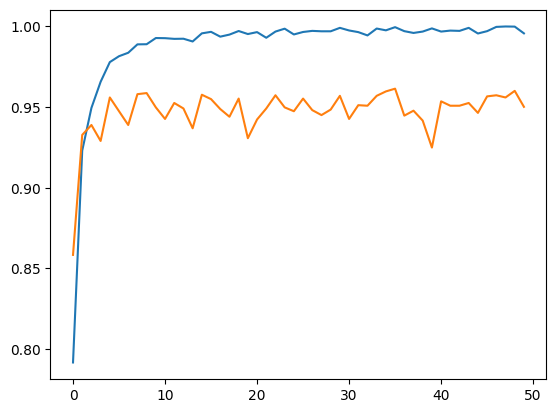

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [35]:
eval_result1 = hypermodel1.evaluate(img_test, y_test)
print("[test loss, test accuracy]:", eval_result1)

458/458 [==============================] - 2s 4ms/step - loss: 0.0673 - accuracy: 0.9900
[test loss, test accuracy]: [0.06729969382286072, 0.9899658560752869]


cai thien mo hinh bang viec chon thuat toan toi uu de cai thien weight va bias qua tung buoc

In [36]:
from keras import optimizers
def model_builder_2(hp):
  model = keras.Sequential()
  model.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(Dropout(0.3))
  model.add(Conv2D(64, (3,3),padding='same', activation='relu'))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(units=32, activation='relu'))
  model.add(keras.layers.Dense(3,activation='softmax'))

  optimizer = hp.Choice('optimizer', values = ['adam','sgd','rmsprop','adadelta'])

  model.compile(optimizer=optimizer, loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [37]:
tuner = kt.RandomSearch(model_builder_2,
                        objective='val_accuracy',
                        max_trials=5,
                        directory = 'parameter1',
                        project_name='5')

In [38]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [39]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [40]:
tuner.search(img_train,y_train, epochs=30, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal optimizer for the optimizer
is {best_hps.get('optimizer') }
""")

Trial 4 Complete [00h 02m 24s]
val_accuracy: 0.7395904660224915

Best val_accuracy So Far: 0.9529010057449341
Total elapsed time: 00h 05m 48s

The hyperparameter search is complete. The optimal optimizer for the optimizer
is rmsprop



In [41]:
model2 = tuner.hypermodel.build(best_hps)
history = model2.fit(img_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
367/367 [==============================] - 5s 11ms/step - loss: 0.5969 - accuracy: 0.7517 - val_loss: 0.2718 - val_accuracy: 0.9089
Epoch 2/50
367/367 [==============================] - 4s 11ms/step - loss: 0.2079 - accuracy: 0.9236 - val_loss: 0.2066 - val_accuracy: 0.9270
Epoch 3/50
367/367 [==============================] - 4s 10ms/step - loss: 0.1280 - accuracy: 0.9542 - val_loss: 0.3234 - val_accuracy: 0.8983
Epoch 4/50
367/367 [==============================] - 4s 10ms/step - loss: 0.0916 - accuracy: 0.9651 - val_loss: 0.1797 - val_accuracy: 0.9447
Epoch 5/50
367/367 [==============================] - 5s 13ms/step - loss: 0.0699 - accuracy: 0.9745 - val_loss: 0.2276 - val_accuracy: 0.9304
Epoch 6/50
367/367 [==============================] - 4s 11ms/step - loss: 0.0477 - accuracy: 0.9843 - val_loss: 0.1882 - val_accuracy: 0.9522
Epoch 7/50
367/367 [==============================] - 4s 11ms/step - loss: 0.0407 - accuracy: 0.9871 - val_loss: 0.2767 - val_accuracy: 0.9392

In [42]:
hypermodel2 = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel2.fit(img_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/19
367/367 [==============================] - 6s 12ms/step - loss: 0.5879 - accuracy: 0.7433 - val_loss: 0.5008 - val_accuracy: 0.7945
Epoch 2/19
367/367 [==============================] - 4s 11ms/step - loss: 0.2307 - accuracy: 0.9127 - val_loss: 0.1937 - val_accuracy: 0.9345
Epoch 3/19
367/367 [==============================] - 4s 10ms/step - loss: 0.1421 - accuracy: 0.9469 - val_loss: 0.2082 - val_accuracy: 0.9321
Epoch 4/19
367/367 [==============================] - 4s 10ms/step - loss: 0.0966 - accuracy: 0.9644 - val_loss: 0.1877 - val_accuracy: 0.9324
Epoch 5/19
367/367 [==============================] - 4s 10ms/step - loss: 0.0695 - accuracy: 0.9739 - val_loss: 0.2227 - val_accuracy: 0.9461
Epoch 6/19
367/367 [==============================] - 4s 11ms/step - loss: 0.0524 - accuracy: 0.9804 - val_loss: 0.1715 - val_accuracy: 0.9522
Epoch 7/19
367/367 [==============================] - 4s 10ms/step - loss: 0.0437 - accuracy: 0.9852 - val_loss: 0.2050 - val_accuracy: 0.9461

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 53824)             0         
                                                                 
 dense (Dense)               (None, 32)                1722400   
                                                        

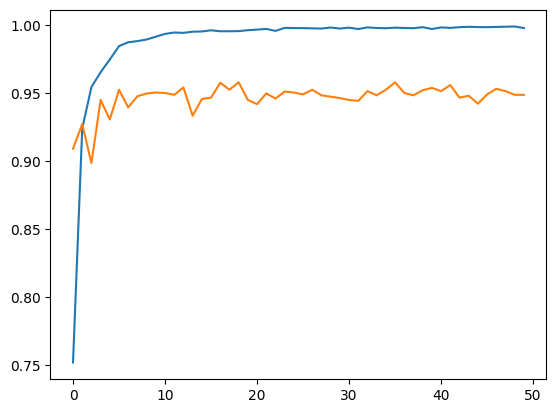

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [45]:
eval_result2 = hypermodel2.evaluate(img_test, y_test)
print("[test loss, test accuracy]:", eval_result2)

458/458 [==============================] - 3s 5ms/step - loss: 0.1049 - accuracy: 0.9889
[test loss, test accuracy]: [0.10494541376829147, 0.9889419674873352]


cai thien mo hinh bang cach chon so luong don vi trong lop full connected dau tien

In [46]:
def model_builder_3(hp):
  model = keras.Sequential()
  model.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(Dropout(hp.Choice(name='dropout',values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
  model.add(Conv2D(64, (3,3),padding='same', activation='relu'))
  model.add(keras.layers.Flatten())

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(3,activation='softmax'))

  model.compile(optimizer='rmsprop', loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [47]:
tuner = kt.RandomSearch(model_builder_3,
                        objective='val_accuracy',
                        max_trials=5,
                        directory = 'parameter2',
                        project_name='1')

In [48]:
tuner.search(img_train,y_train, epochs=30, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')}.
""")

Trial 5 Complete [00h 00m 35s]
val_accuracy: 0.9542661905288696

Best val_accuracy So Far: 0.9542661905288696
Total elapsed time: 00h 03m 31s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 32.



In [49]:

model3 = tuner.hypermodel.build(best_hps)
history = model3.fit(img_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
367/367 [==============================] - 6s 12ms/step - loss: 0.6466 - accuracy: 0.7324 - val_loss: 0.3217 - val_accuracy: 0.8819
Epoch 2/50
367/367 [==============================] - 4s 10ms/step - loss: 0.2539 - accuracy: 0.9055 - val_loss: 0.2319 - val_accuracy: 0.9137
Epoch 3/50
367/367 [==============================] - 4s 10ms/step - loss: 0.1678 - accuracy: 0.9395 - val_loss: 0.1657 - val_accuracy: 0.9403
Epoch 4/50
367/367 [==============================] - 4s 10ms/step - loss: 0.1186 - accuracy: 0.9604 - val_loss: 0.2218 - val_accuracy: 0.9239
Epoch 5/50
367/367 [==============================] - 4s 11ms/step - loss: 0.0903 - accuracy: 0.9683 - val_loss: 0.1627 - val_accuracy: 0.9464
Epoch 6/50
367/367 [==============================] - 4s 10ms/step - loss: 0.0648 - accuracy: 0.9776 - val_loss: 0.1688 - val_accuracy: 0.9474
Epoch 7/50
367/367 [==============================] - 5s 13ms/step - loss: 0.0539 - accuracy: 0.9812 - val_loss: 0.1959 - val_accuracy: 0.9403

In [66]:
hypermodel3 = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel3.fit(img_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/24
367/367 [==============================] - 5s 11ms/step - loss: 0.6068 - accuracy: 0.7389 - val_loss: 0.3506 - val_accuracy: 0.8703
Epoch 2/24
367/367 [==============================] - 4s 10ms/step - loss: 0.2353 - accuracy: 0.9153 - val_loss: 0.2109 - val_accuracy: 0.9246
Epoch 3/24
367/367 [==============================] - 4s 11ms/step - loss: 0.1445 - accuracy: 0.9455 - val_loss: 0.1464 - val_accuracy: 0.9488
Epoch 4/24
367/367 [==============================] - 4s 10ms/step - loss: 0.1026 - accuracy: 0.9637 - val_loss: 0.1798 - val_accuracy: 0.9392
Epoch 5/24
367/367 [==============================] - 3s 10ms/step - loss: 0.0759 - accuracy: 0.9722 - val_loss: 0.1360 - val_accuracy: 0.9556
Epoch 6/24
367/367 [==============================] - 4s 11ms/step - loss: 0.0577 - accuracy: 0.9805 - val_loss: 0.1516 - val_accuracy: 0.9522
Epoch 7/24
367/367 [==============================] - 4s 11ms/step - loss: 0.0472 - accuracy: 0.9838 - val_loss: 0.2050 - val_accuracy: 0.9474

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 53824)             0         
                                                                 
 dense (Dense)               (None, 32)                1722400   
                                                        

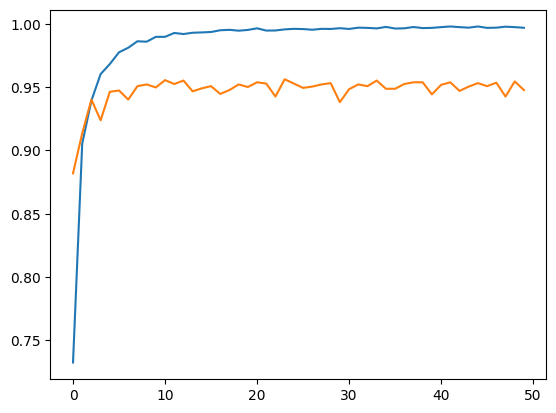

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [69]:
eval_result3 = hypermodel3.evaluate(img_test, y_test)
print("[test loss, test accuracy]:", eval_result3)

458/458 [==============================] - 2s 5ms/step - loss: 0.1191 - accuracy: 0.9884
[test loss, test accuracy]: [0.11913496255874634, 0.9883959293365479]


ket hop cac gia tri toi uu

In [70]:
last_model = keras.Sequential()
last_model.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
last_model.add(MaxPooling2D(pool_size=(2,2)))

last_model.add(Conv2D(64, (3,3), activation='relu'))
last_model.add(Dropout(0.4))
last_model.add(Conv2D(64, (3,3),padding='same', activation='relu'))
last_model.add(keras.layers.Flatten())

last_model.add(keras.layers.Dense(units=32, activation='relu'))
last_model.add(keras.layers.Dense(3,activation='softmax'))

last_model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
                   loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])


In [71]:
best_hpo = last_model.fit(img_train,y_train, batch_size=32, epochs=40,validation_split=0.2)

Epoch 1/40
367/367 [==============================] - 7s 12ms/step - loss: 0.6350 - accuracy: 0.7218 - val_loss: 0.3801 - val_accuracy: 0.8747
Epoch 2/40
367/367 [==============================] - 4s 10ms/step - loss: 0.2472 - accuracy: 0.9076 - val_loss: 0.1930 - val_accuracy: 0.9365
Epoch 3/40
367/367 [==============================] - 4s 11ms/step - loss: 0.1531 - accuracy: 0.9462 - val_loss: 0.2618 - val_accuracy: 0.9082
Epoch 4/40
367/367 [==============================] - 4s 11ms/step - loss: 0.1027 - accuracy: 0.9626 - val_loss: 0.1645 - val_accuracy: 0.9509
Epoch 5/40
367/367 [==============================] - 4s 10ms/step - loss: 0.0762 - accuracy: 0.9734 - val_loss: 0.1560 - val_accuracy: 0.9505
Epoch 6/40
367/367 [==============================] - 4s 11ms/step - loss: 0.0581 - accuracy: 0.9783 - val_loss: 0.1790 - val_accuracy: 0.9515
Epoch 7/40
367/367 [==============================] - 4s 11ms/step - loss: 0.0469 - accuracy: 0.9832 - val_loss: 0.1870 - val_accuracy: 0.9529

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 53824)             0         
                                                                 
 dense (Dense)               (None, 32)                1722400   
                                                        

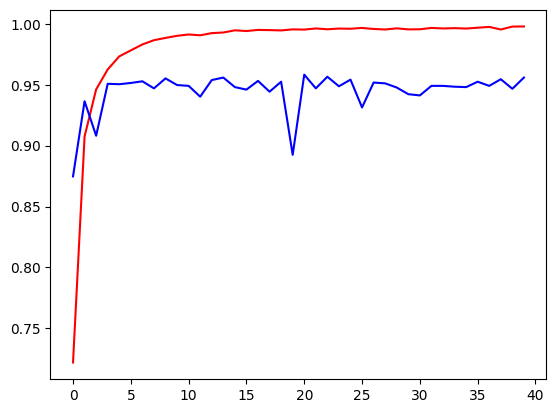

In [73]:
loss = best_hpo.history['loss']
val_loss = best_hpo.history['val_loss']
accuracy = best_hpo.history['accuracy']
val_accuracy = best_hpo.history['val_accuracy']
plt.plot(accuracy, c='red')
plt.plot(val_accuracy, c='blue')

In [74]:
last_result = last_model.evaluate(img_test, y_test)
print("[test loss, test accuracy]:", last_result)

458/458 [==============================] - 2s 5ms/step - loss: 0.1630 - accuracy: 0.9907
[test loss, test accuracy]: [0.1630161851644516, 0.9907166957855225]
